# Mercedes-Benz Greener Manufacturing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
from sklearn.decomposition import PCA
import xgboost
from sklearn.model_selection import train_test_split, GridSearchCV
warnings.filterwarnings("ignore")

In [2]:
train_df= pd.read_csv('train.csv')

In [3]:
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
train_df.shape

(4209, 378)

In [7]:
test_df.shape

(4209, 377)

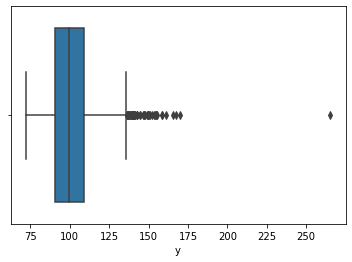

In [8]:
# let's explore y variable
sns.boxplot(x=train_df.y)
plt.show()

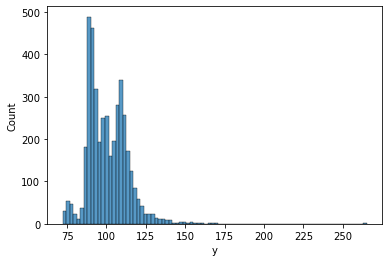

In [9]:
sns.histplot(train_df.y)
plt.show()

In [10]:
train_df.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

# lets remove the outliers by IQR method

In [11]:
Q1 = train_df['y'].quantile(0.25)
Q3= train_df['y'].quantile(0.75)
IQR = Q3-Q1
IQR

18.190000000000012

In [12]:
lower_limit= round(Q1 - 1.5*IQR,2)
upper_limit = round(Q3 + 1.5*IQR,2)
print('lower limit= ',lower_limit)
print('upper limit= ',upper_limit)

lower limit=  63.53
upper limit=  136.3


In [13]:
train_df= train_df[(train_df['y']>lower_limit) & (train_df['y']<upper_limit)]

In [14]:
train_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


BOX PLOT AFTER REMOVING OUTLIERS

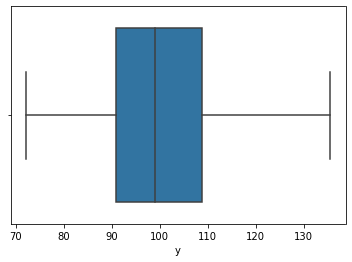

In [15]:
sns.boxplot(x=train_df.y)
plt.show()

# If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [16]:
train_var= train_df.var().reset_index()
train_var.columns= ['Columns', 'Variance']

In [17]:
train_var.sort_values(by='Variance').head(15)

,Columns,Variance
283,X297,0.00000
254,X268,0.00000
275,X289,0.00000
324,X339,0.00000
276,X290,0.00000
279,X293,0.00000
97,X107,0.00000
221,X235,0.00000
219,X233,0.00000
83,X93,0.00000


In [18]:
col_train = train_var.sort_values(by='Variance').head(13)
col_train= col_train.Columns.iloc[0:13].to_list()
col_train

['X297',
 'X268',
 'X289',
 'X339',
 'X290',
 'X293',
 'X107',
 'X235',
 'X233',
 'X93',
 'X347',
 'X330',
 'X11']

In [19]:
test_var= test_df.var().reset_index()
test_var.columns= ['Columns', 'Variance']

In [20]:
test_var.sort_values(by='Variance').head(15)

,Columns,Variance
280,X295,0.000000
353,X369,0.000000
281,X296,0.000000
242,X257,0.000000
243,X258,0.000000
263,X278,0.000238
218,X233,0.000238
265,X280,0.000238
275,X290,0.000238
278,X293,0.000238


In [21]:
col_test = test_var.sort_values(by='Variance').head(5)
col_test= col_test.Columns.iloc[0:6].to_list()
col_test

['X295', 'X369', 'X296', 'X257', 'X258']

In [22]:
train_df.drop(columns=col_train,inplace=True)
test_df.drop(columns=col_test,inplace=True)

In [23]:
train_df.shape

(4159, 365)

In [24]:
test_df.shape

(4209, 372)

# Check for null and unique values for test and train sets.

In [25]:
null_train= train_df.isnull().sum()

In [26]:
null_train[null_train!=0]

Series([], dtype: int64)

In [27]:
null_test= test_df.isnull().sum()

In [28]:
null_test[null_test!=0]

Series([], dtype: int64)

In [29]:
train_df['X20'].unique()

array([0, 1], dtype=int64)

In [30]:
train_df.describe(include='O')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4159,4159,4159,4159,4159,4159,4159,4159
unique,47,27,43,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,359,826,1637,1906,4155,230,1030,272


In [31]:
test_df.describe(include='O')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [32]:
obj_col = train_df.describe(include='O').columns.to_list()

In [33]:
obj_col

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [34]:
for i in obj_col:
    print('unique for', i)
    print(train_df[i].unique())
    print()

unique for X0
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']

unique for X1
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']

unique for X2
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'x' 'au' 't' 'an' 'z'
 'ah' 'p' 'am' 'h' 'j' 'q' 'af' 'l' 'c' 'o' 'ar']

unique for X3
['a' 'e' 'c' 'f' 'd' 'b' 'g']

unique for X4
['d' 'b' 'c' 'a']

unique for X5
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']

unique for X6
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']

unique for X8
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']



In [35]:
for i in obj_col:
    print('unique for', i)
    print(test_df[i].unique())
    print()

unique for X0
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']

unique for X1
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']

unique for X2
['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']

unique for X3
['f' 'a' 'c' 'e' 'd' 'g' 'b']

unique for X4
['d' 'b' 'a' 'c']

unique for X5
['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']

unique for X6
['a' 'g' 'j' 'l' 'i' 'd' 'f' 'h' 'c' 'k' 'e' 'b']

unique for X8
['w' 'y' 'j' 'n' 'm' 's' 'a' 'v' 'r' 'o' 't' 'h' 'c' 'k' 'p' 'u' 'd' 'g'
 'b' 'q' 'e' 'l' 'f' 'i' '

# Apply label encoder

In [36]:
label = LabelEncoder()

In [37]:
for i in obj_col:
    train_df[i]= label.fit_transform(train_df[i])
    test_df[i]= label.fit_transform(test_df[i])

In [38]:
train_df[obj_col]

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,16,0,3,24,9,14
1,32,21,18,4,3,28,11,14
2,20,24,33,2,3,27,9,23
3,20,21,33,5,3,27,11,4
4,20,23,33,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,15,2,3,0,3,16
4205,31,16,39,3,3,0,7,7
4206,8,23,37,0,3,0,6,4
4207,9,19,24,5,3,0,11,20


In [39]:
test_df[obj_col]

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12
...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4
4205,42,1,8,3,3,1,9,24
4206,47,23,17,5,3,1,3,22
4207,7,23,17,0,3,1,2,16


In [40]:
train_df_y = train_df['y']

In [41]:
train_df_x = train_df.drop(columns=['y','ID'])

In [42]:
X_train, X_test, y_train, y_test = train_test_split( train_df_x, train_df_y, test_size=0.2, random_state=42)

In [43]:
X_test

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
3584,43,23,39,2,3,22,9,6,0,0,...,0,1,0,0,0,0,0,0,0,0
3749,46,1,20,2,3,25,9,2,1,0,...,1,0,0,0,0,0,0,0,0,0
176,8,15,7,5,3,13,6,15,0,1,...,0,0,0,0,0,0,0,0,0,0
2674,8,20,15,4,3,17,9,19,0,0,...,1,0,0,0,0,0,0,0,0,0
2137,44,1,21,2,3,16,9,14,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,44,23,0,1,3,0,9,14,0,0,...,1,0,0,0,0,0,0,0,0,0
1790,18,13,7,5,3,4,8,4,0,1,...,0,0,0,0,0,0,0,0,0,0
2566,42,20,15,6,3,17,9,5,0,0,...,1,0,0,0,0,0,0,0,0,0
1300,27,20,32,2,3,2,6,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Perform dimensionality reduction

In [44]:
pca = PCA( n_components=20)

In [45]:
X_train_pca= pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [46]:
X_train_pca.shape, X_test_pca.shape

((3327, 20), (832, 20))

In [47]:
parameters = {
    'learning_rate': [0.01, 0.1,0.2],
    'n_estimators': [600,700,800],
    'max_depth': [1,2,3]
}

In [48]:
xgb = xgboost.XGBRegressor()

In [49]:
grid= GridSearchCV(estimator=xgb, param_grid=parameters,scoring='r2')

In [50]:
result= grid.fit(X_train_pca,y_train)
result.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 800}

In [51]:
xgb = xgboost.XGBRegressor(n_estimators=800, max_depth=3, learning_rate= 0.01,random_state=42)

In [52]:
xgb.fit(X_train_pca,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=800, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [53]:
y_pred = xgb.predict(X_test_pca)

In [54]:
test_df_pca= pca.fit_transform(test_df)

# Predict your test_df values using XGBoost.

In [55]:
test_pred = xgb.predict(test_df_pca)


In [56]:
test_pred

array([109.16685 , 103.78471 , 105.42399 , ..., 111.661064,  92.46361 ,
        92.49288 ], dtype=float32)

In [57]:
test_pred = pd.DataFrame(test_pred)

In [58]:
test_pred.columns=['y']

In [59]:
test_pred['y']= test_pred['y'].apply(lambda x: round(x,2))

In [60]:
test_pred

,y
0,109.17
1,103.78
2,105.42
3,102.81
4,107.75
...,...
4204,101.14
4205,104.33
4206,111.66
4207,92.46
